In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets


In [7]:
iris=datasets.load_iris()
x=iris.data
print(x)
y=iris.target
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [8]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [10]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
le=LabelEncoder()
y_new=le.fit_transform(y)
print(y_new)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [31]:
x_test,x_train,y_test,y_train=train_test_split(x,y_new,test_size=.25,random_state=4)
print(y_test)

[1 0 2 0 1 0 2 0 0 1 1 2 0 1 2 2 1 1 0 1 2 1 0 1 0 1 2 1 2 1 0 2 2 0 1 2 0
 2 1 2 1 0 2 1 2 0 2 1 2 1 2 1 1 2 1 1 2 1 1 0 2 0 1 0 1 1 1 1 0 2 2 1 1 1
 0 0 2 2 0 0 0 2 0 0 2 2 1 0 0 0 2 1 0 0 2 1 2 0 0 2 1 1 1 2 2 1 2 1 1 2 2
 2]


In [41]:
NB=GaussianNB()
NB.fit(x_train,y_train)
y_predict=NB.predict(x_test)
print("test class\n",y_test)
print("\npredict class\n",y_predict)


test class
 [1 0 2 0 1 0 2 0 0 1 1 2 0 1 2 2 1 1 0 1 2 1 0 1 0 1 2 1 2 1 0 2 2 0 1 2 0
 2 1 2 1 0 2 1 2 0 2 1 2 1 2 1 1 2 1 1 2 1 1 0 2 0 1 0 1 1 1 1 0 2 2 1 1 1
 0 0 2 2 0 0 0 2 0 0 2 2 1 0 0 0 2 1 0 0 2 1 2 0 0 2 1 1 1 2 2 1 2 1 1 2 2
 2]

predict class
 [2 0 2 0 1 0 2 0 0 1 1 2 0 1 2 2 1 1 0 1 1 1 0 1 0 1 2 2 2 1 0 1 2 0 1 2 0
 2 1 2 1 0 1 1 2 0 2 1 2 1 2 1 2 2 1 1 2 1 1 0 2 0 2 0 1 1 1 1 0 2 2 1 1 1
 0 0 2 2 0 0 0 2 0 0 2 2 1 0 0 0 2 2 0 0 2 2 2 0 0 2 1 1 1 2 2 1 2 2 1 2 2
 2]


In [38]:
print(NB.predict_proba(x_test))

[[2.93555785e-114 3.03303414e-001 6.96696586e-001]
 [1.00000000e+000 5.27319685e-015 1.44772863e-030]
 [9.69295009e-271 2.31306866e-010 1.00000000e+000]
 [1.00000000e+000 2.44756642e-014 5.74299387e-030]
 [2.05104526e-095 8.52929461e-001 1.47070539e-001]
 [1.00000000e+000 1.31347936e-014 4.36722556e-030]
 [2.13163014e-224 1.22596994e-005 9.99987740e-001]
 [1.00000000e+000 5.66284761e-015 1.44083106e-032]
 [1.00000000e+000 5.47131303e-014 1.04293088e-029]
 [6.09700977e-094 9.93575986e-001 6.42401389e-003]
 [6.47940418e-101 9.68984580e-001 3.10154204e-002]
 [8.14072143e-176 1.02174691e-003 9.98978253e-001]
 [1.00000000e+000 2.45641594e-014 7.53234532e-030]
 [2.30817193e-058 9.99998547e-001 1.45321834e-006]
 [3.08154178e-318 3.92416066e-011 1.00000000e+000]
 [5.68368259e-248 6.87806149e-007 9.99999312e-001]
 [6.92304549e-084 9.97161910e-001 2.83809042e-003]
 [2.68919451e-079 9.99683965e-001 3.16034917e-004]
 [9.99999502e-001 4.98213105e-007 7.30279409e-021]
 [2.02029606e-061 9.99990392e-0

In [34]:
print(accuracy_score(y_test,y_predict,normalize=False))

102


In [35]:
cm=confusion_matrix(y_test,y_predict,normalize=None,labels=NB.classes_)
print(cm)


[[32  0  0]
 [ 0 35  7]
 [ 0  3 35]]


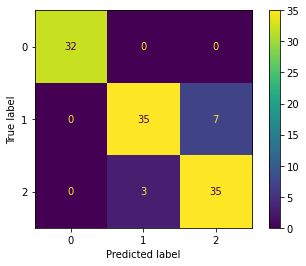

In [36]:
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=NB.classes_)
cm_dis.plot()
plt.show()